## Import the packages

In [10]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 68.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.3 which is incompatible.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.9.2 which is incompatible.


In [11]:
import sklearn
print(sklearn.__version__)

1.5.2


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore')

import joblib

## Import the dataset

In [13]:
dataframe=pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
dataframe.shape

(32581, 12)

In [14]:
dataframe.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [15]:
dataframe.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Dataset Preprocessing

In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [17]:
dataframe.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### 1. removing null values

In [18]:
new_df=dataframe.dropna(subset=['loan_int_rate'])
print('Null values in the new_dataframe :')
print(new_df.isna().sum())

new_df.head(10)

Null values in the new_dataframe :
person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             827
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.00,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.00,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.00,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.00,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.00,VENTURE,D,1600,14.74,1,0.16,N,3


In [19]:
new_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,29465.00,29465.00,28638.00,29465.00,29465.00,29465.00,29465.00,29465.00
mean,27.71,66020.47,4.79,9584.74,11.01,0.22,0.17,5.79
std,6.30,61901.42,4.15,6316.27,3.24,0.41,0.11,4.03
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79100.00,7.00,12250.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


In [20]:
#A function to get value counts for each columns

def count_value(dataframe):
    cols=dataframe.columns
    for col in cols:
        if dataframe[col].nunique() < 30:
            print(f'Value counts for {col} :')
            print(dataframe[col].value_counts())
            print('------------------')


### 2. Removing outlier

In [21]:
def outlier(dataframe,column):
    q1=dataframe[column].quantile(0.25)
    q3=dataframe[column].quantile(0.75)
    
    IQR=q3-q1
    
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    
    outliers=dataframe[(dataframe[column]<lower_bound) | (dataframe[column]>upper_bound)]
    
    return outliers

In [22]:
outlier_emp_length=outlier(new_df,'person_emp_length')
outlier_emp_length.shape

(773, 12)

In [23]:
outlier_emp_length.sort_values(by='person_emp_length',ascending=False).head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.00,VENTURE,A,20000,6.54,0,0.10,N,4
32355,78,48000,RENT,41.00,MEDICAL,A,3000,7.51,0,0.06,N,25
32515,53,106000,MORTGAGE,38.00,PERSONAL,B,20000,9.88,0,0.19,N,23
32428,58,49000,MORTGAGE,34.00,MEDICAL,D,7500,13.55,1,0.15,Y,24
32263,46,180000,MORTGAGE,31.00,MEDICAL,B,18000,9.91,0,0.10,N,12
31867,46,180000,MORTGAGE,31.00,VENTURE,B,18000,9.91,0,0.10,N,11
31866,47,178000,OWN,31.00,VENTURE,B,9000,10.99,0,0.05,N,17
30914,48,70000,MORTGAGE,31.00,HOMEIMPROVEMENT,D,9000,14.54,0,0.13,N,17
32539,61,148000,MORTGAGE,30.00,DEBTCONSOLIDATION,B,24000,10.38,1,0.16,N,20


In [24]:
new_df.drop([0,210],inplace=True)
new_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.00,VENTURE,A,2500,7.14,1,0.25,N,2


In [25]:
new_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,29463.00,29463.00,28636.00,29463.00,29463.00,29463.00,29463.00,29463.00
mean,27.72,66016.43,4.78,9583.53,11.01,0.22,0.17,5.79
std,6.30,61899.16,4.04,6314.46,3.24,0.41,0.11,4.03
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79100.00,7.00,12250.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,41.00,35000.00,23.22,1.00,0.83,30.00


In [26]:
age_outlier = outlier(new_df,'person_age')
age_outlier.sort_values(by='person_age',ascending=False).head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.00,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.00,EDUCATION,B,6000,11.86,0,0.03,N,2
32297,144,6000000,MORTGAGE,12.00,PERSONAL,C,5000,12.73,0,0.00,N,25
575,123,80004,RENT,2.00,EDUCATION,B,20400,10.25,0,0.25,N,3
32506,84,94800,MORTGAGE,2.00,PERSONAL,A,10000,7.51,0,0.11,N,24
32422,80,64000,RENT,7.00,MEDICAL,B,6800,11.71,0,0.11,N,25
32355,78,48000,RENT,41.00,MEDICAL,A,3000,7.51,0,0.06,N,25
32534,76,75000,RENT,23.00,MEDICAL,A,15000,8.94,0,0.20,N,25
32381,73,42000,MORTGAGE,7.00,PERSONAL,A,5000,7.49,0,0.12,N,28
32521,73,39240,RENT,0.00,MEDICAL,B,1800,12.53,0,0.05,N,21


In [27]:
new_df.drop([81,183,32297,575],inplace=True)

In [28]:
income_outlier=outlier(new_df,'person_income')
print('Shape of the dataframe :', income_outlier.shape)
income_outlier.sort_values(by='person_income',ascending=False).head(10)


Shape of the dataframe : (1453, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30049,42,2039784,RENT,0.00,VENTURE,C,8450,12.29,0,0.00,Y,15
32497,63,1782000,RENT,13.00,EDUCATION,C,12025,14.27,0,0.01,N,30
31924,44,1440000,MORTGAGE,7.00,DEBTCONSOLIDATION,A,6400,7.40,0,0.00,N,15
31922,47,1362000,MORTGAGE,9.00,VENTURE,A,6600,7.74,0,0.00,N,17
29119,36,1200000,OWN,16.00,MEDICAL,A,10000,6.54,0,0.01,N,11
17833,32,1200000,MORTGAGE,1.00,VENTURE,A,12000,7.51,0,0.01,N,8
17834,34,948000,MORTGAGE,18.00,PERSONAL,B,2000,9.99,0,0.00,N,7
32298,58,900000,RENT,18.00,DEBTCONSOLIDATION,C,19600,13.98,0,0.02,N,28
31921,37,900000,MORTGAGE,5.00,PERSONAL,C,25000,12.87,0,0.03,Y,13
29121,50,900000,MORTGAGE,11.00,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15


In [29]:
loan_amnt_outlier=outlier(new_df,'loan_amnt')
loan_amnt_outlier.sort_values(by='loan_amnt').head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
23594,31,65000,MORTGAGE,3.00,DEBTCONSOLIDATION,A,23200,7.90,0,0.36,N,10
23930,30,67692,MORTGAGE,NaN,PERSONAL,C,23200,15.96,0,0.34,Y,7
8738,25,60000,MORTGAGE,9.00,DEBTCONSOLIDATION,B,23275,12.42,0,0.39,N,3
30770,36,65000,MORTGAGE,6.00,EDUCATION,C,23325,15.27,0,0.36,Y,14
476,22,66960,RENT,1.00,VENTURE,A,23400,7.49,1,0.35,N,2
17220,22,166000,MORTGAGE,1.00,PERSONAL,B,23450,11.36,0,0.14,N,2
15764,22,166000,MORTGAGE,1.00,EDUCATION,B,23450,11.36,0,0.14,N,3
25997,28,95000,MORTGAGE,5.00,DEBTCONSOLIDATION,A,23450,7.90,0,0.25,N,5
18270,29,90000,RENT,0.00,VENTURE,B,23475,11.58,0,0.26,N,6
18265,29,40000,RENT,2.00,DEBTCONSOLIDATION,B,23500,11.12,1,0.59,N,8


In [30]:
new_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,29459.00,29459.00,28632.00,29459.00,29459.00,29459.00,29459.00,29459.00
mean,27.70,65803.73,4.78,9583.60,11.01,0.22,0.17,5.79
std,6.17,51331.10,4.04,6314.42,3.24,0.41,0.11,4.03
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79050.00,7.00,12250.00,13.47,0.00,0.23,8.00
max,84.00,2039784.00,41.00,35000.00,23.22,1.00,0.83,30.00


In [31]:
new_df.isna().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             827
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [32]:
new_df=new_df.dropna()
new_df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### 3. getting the correlation among the columns

In [33]:
numeric_df=new_df.select_dtypes(exclude='object')
corr_mat=numeric_df.corr()
corr_mat

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.00,0.14,0.18,0.06,0.01,-0.02,-0.04,0.88
person_income,0.14,1.00,0.16,0.32,-0.00,-0.17,-0.30,0.12
person_emp_length,0.18,0.16,1.00,0.11,-0.06,-0.09,-0.06,0.15
loan_amnt,0.06,0.32,0.11,1.00,0.15,0.11,0.58,0.05
loan_int_rate,0.01,-0.00,-0.06,0.15,1.00,0.34,0.12,0.02
loan_status,-0.02,-0.17,-0.09,0.11,0.34,1.00,0.38,-0.02
loan_percent_income,-0.04,-0.30,-0.06,0.58,0.12,0.38,1.00,-0.03
cb_person_cred_hist_length,0.88,0.12,0.15,0.05,0.02,-0.02,-0.03,1.00


Text(0.5, 1.0, 'Correlation among the numeric columns')

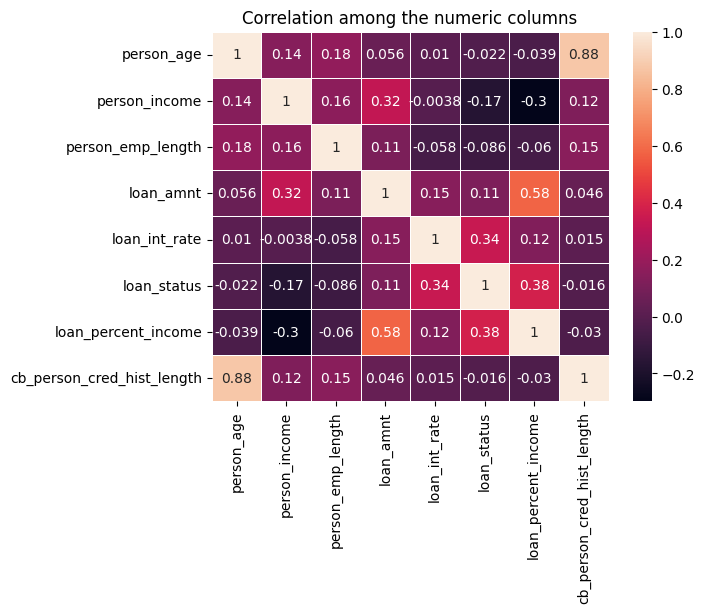

In [34]:
sns.heatmap(corr_mat,annot=True,linewidth=0.5)
plt.title('Correlation among the numeric columns')

In [35]:
 def plot_columns(dataframe):
        columns=dataframe.columns
        for col in columns:
            sns.kdeplot(x=dataframe[col],fill=True,data=numeric_df)
            plt.xlabel(f'{col}')
            plt.ylabel('Density')
            plt.title(f'Density of {col} column')
            plt.show()

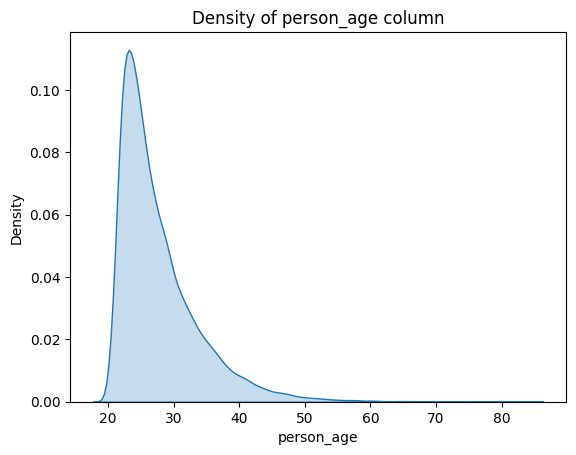

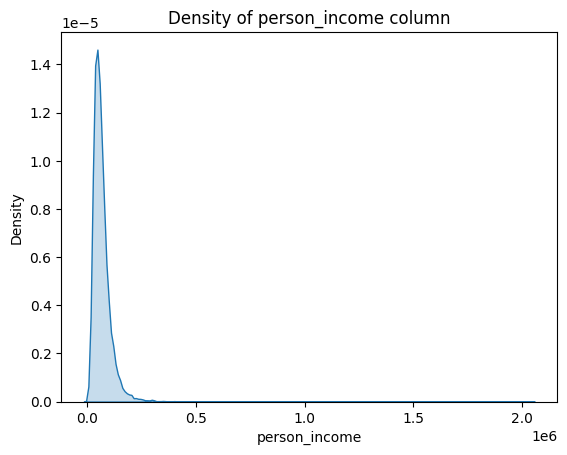

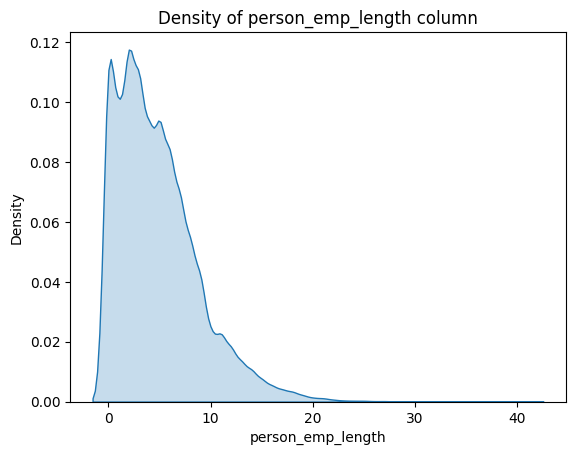

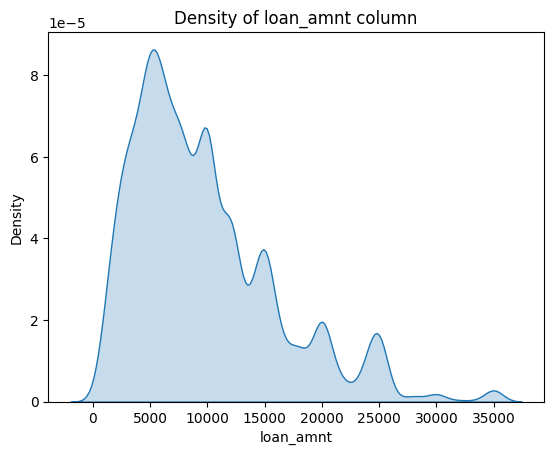

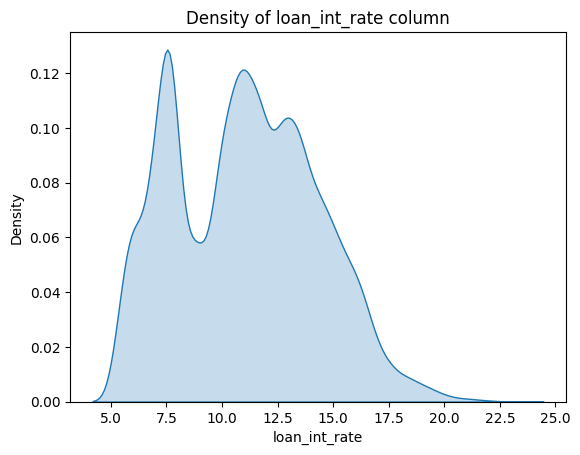

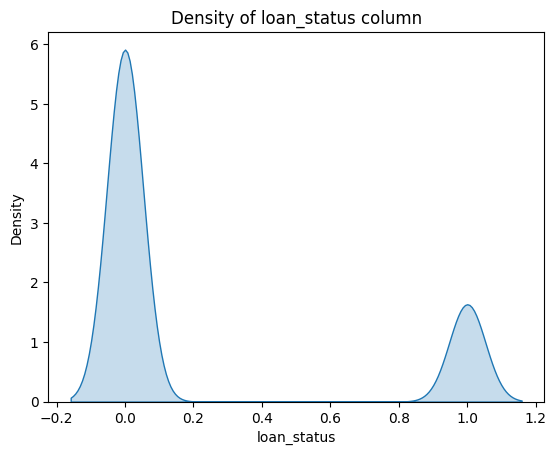

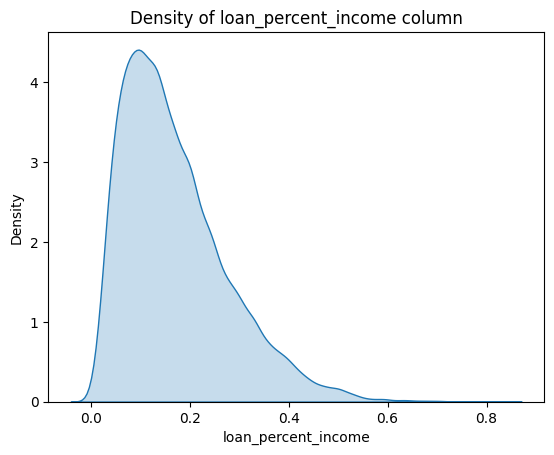

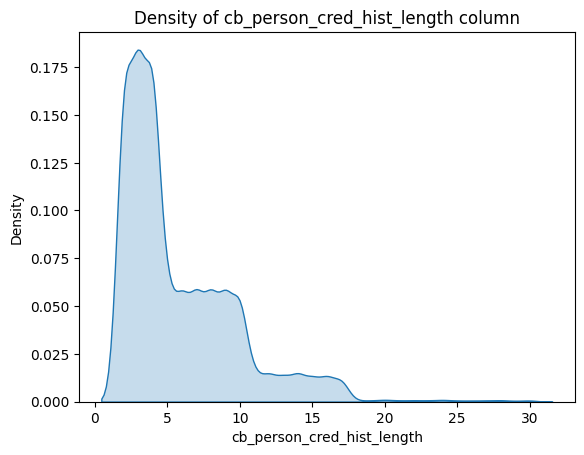

In [36]:
plot_columns(numeric_df)

In [37]:
# dataframe consisting object datatype (except 'loan_status' all the remaining categorical columns is here)
oth_df=dataframe.select_dtypes(include='object')
oth_df.head(10)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
5,OWN,VENTURE,A,N
6,RENT,EDUCATION,B,N
7,RENT,MEDICAL,B,N
8,RENT,PERSONAL,A,N
9,OWN,VENTURE,D,N


In [38]:
def plot_cat(dataframe):
    cols=dataframe.columns
    for col in cols:
        plt.figure(figsize=(12,5))
        sns.countplot(x=dataframe[col])
        plt.xlabel(f'{col}')
        plt.ylabel(f'Count of the {col}')
        plt.title(f'Countplot the {col} columns')
        plt.show()

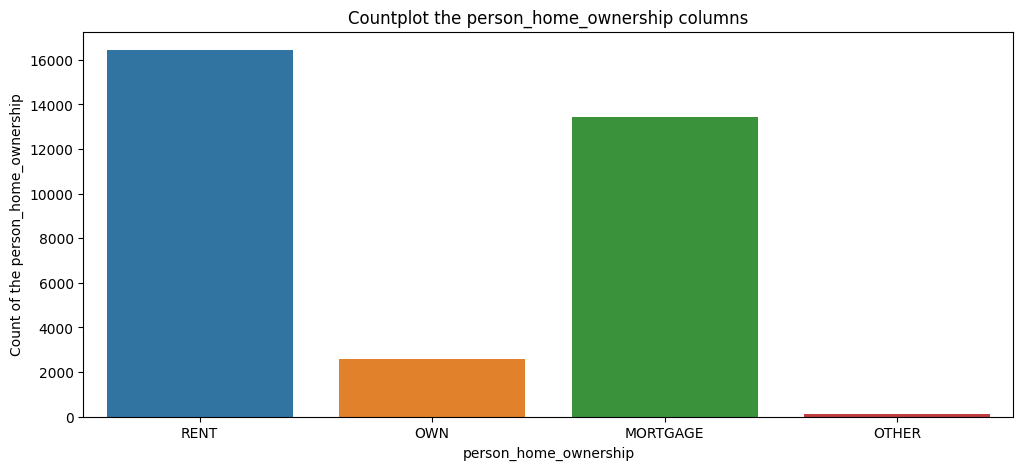

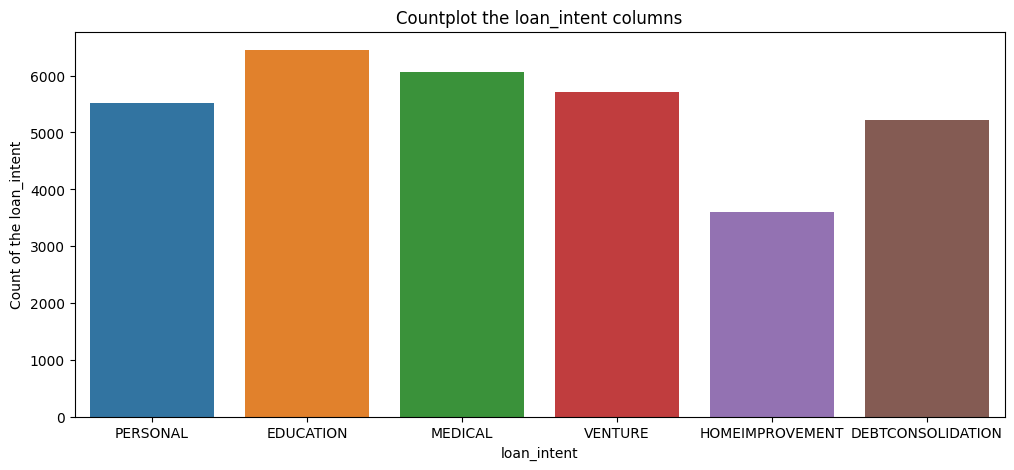

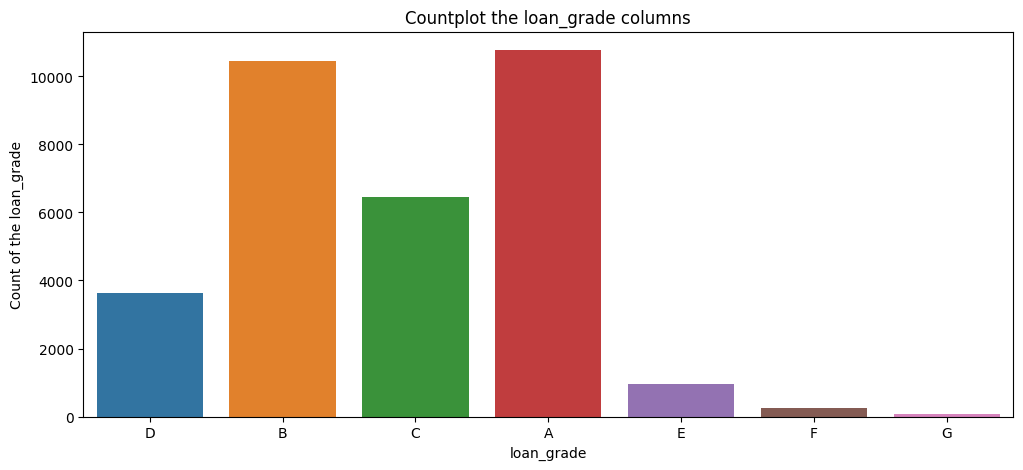

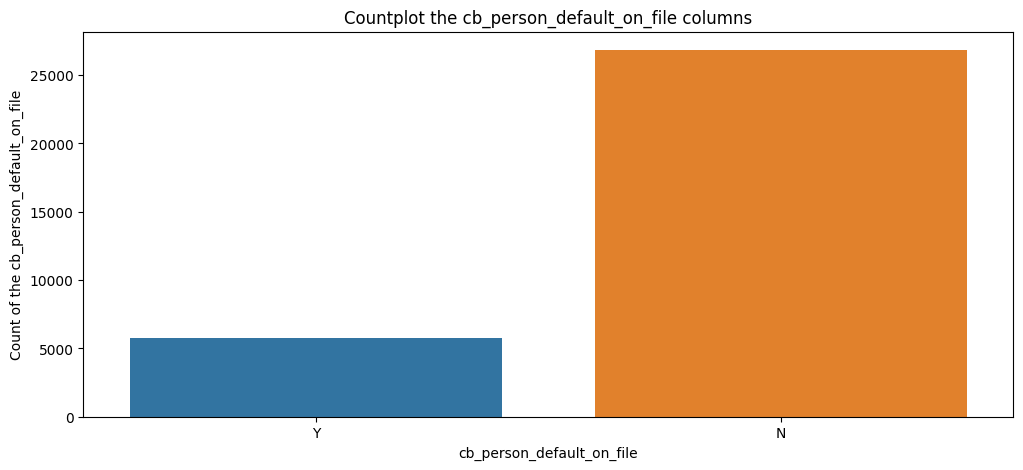

In [43]:
plot_cat(oth_df)

### Data Preprocessing

In [44]:
new_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.00,VENTURE,A,2500,7.14,1,0.25,N,2


In [45]:
new_df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [50]:
new_df['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [51]:
def col_encoding(dataframe):
    cat_cols=dataframe.select_dtypes(include=['object','category']).columns
    encoders={}
    print(cat_cols)
    for col in cat_cols:
        le=LabelEncoder()
        dataframe[col]=le.fit_transform(dataframe[col])
        encoders[col]=le
        joblib.dump(encoders,'encoders.pkl')
    return dataframe.head(20)

In [52]:
col_encoding(new_df)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.00,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.00,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.00,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.00,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2,2.00,5,0,2500,7.14,1,0.25,0,2
6,26,77100,3,8.00,1,1,35000,12.42,1,0.45,0,3
7,24,78956,3,5.00,3,1,35000,11.11,1,0.44,0,4
8,24,83000,3,8.00,4,0,35000,8.90,1,0.42,0,2
9,21,10000,2,6.00,5,3,1600,14.74,1,0.16,0,3
10,22,85000,3,6.00,5,1,35000,10.37,1,0.41,0,4


In [35]:
new_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.00,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.00,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.00,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.00,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2,2.00,5,0,2500,7.14,1,0.25,0,2


In [36]:
# split into train and test set
df=new_df.copy()

x=df.drop('loan_status',axis=1)
y=df['loan_status']

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

print(f'Shape of X_train is : {X_train.shape}')
print(f'Shape of X_test is : {X_test.shape}')
print(f'Shape of y_train is : {y_train.shape}')
print(f'Shape of y_test is : {y_test.shape}')

Shape of X_train is : (20042, 11)
Shape of X_test is : (8590, 11)
Shape of y_train is : (20042,)
Shape of y_test is : (8590,)


## Model 

More than one model will be tested than the model which gives better accuracy scire.
Models which will be used- KNN,Random forest Classifier,Gradient boosting classifier,MLP Classifier

In [37]:
# 1. KNN model

knn_model=KNeighborsClassifier(n_neighbors=7)

knn_model.fit(X_train,y_train)

knn_pred=knn_model.predict(X_test)

In [38]:
knn_acc=accuracy_score(y_test,knn_pred)
print(f'Accuracy of the knn model :{knn_acc*100} ')

Accuracy of the knn model :83.74854481955762 


In [39]:
# 2. Random forest classifier

rfc_model=RandomForestClassifier()

rfc_model.fit(X_train,y_train)

rfc_pred=rfc_model.predict(X_test)

In [40]:
rfc_acc=accuracy_score(y_test,rfc_pred)
print(f'Accuracy of the rfandom forest classifier :{rfc_acc*100}')

Accuracy of the rfandom forest classifier :92.52619324796275


In [41]:
# 3. Gradient Boosting classifier

gbc_model=GradientBoostingClassifier()

gbc_model.fit(X_train,y_train)

gbc_pred=gbc_model.predict(X_test)

In [42]:
gbc_acc=accuracy_score(y_test,gbc_pred)
print(f'Accuracy of the gradient boosing classifier :{gbc_acc*100}')

Accuracy of the gradient boosing classifier :91.9208381839348


In [43]:
# 4. MLPCLASSIFIER

mlp_model=MLPClassifier(hidden_layer_sizes=(16,32,16,8),
                       solver='adam',
                       alpha=0.001,
                       max_iter=100,
                       random_state=42,
                       batch_size=64,
                       verbose=True,
                       )

mlp_model.fit(X_train,y_train)

mlp_pred=mlp_model.predict(X_test)

Iteration 1, loss = 4.15461619
Iteration 2, loss = 2.53045194
Iteration 3, loss = 2.12285788
Iteration 4, loss = 2.17770712
Iteration 5, loss = 2.03803474
Iteration 6, loss = 1.52078706
Iteration 7, loss = 1.28673352
Iteration 8, loss = 0.95746371
Iteration 9, loss = 1.34810323
Iteration 10, loss = 1.06813488
Iteration 11, loss = 0.77347757
Iteration 12, loss = 0.92817698
Iteration 13, loss = 0.96166519
Iteration 14, loss = 0.83046563
Iteration 15, loss = 0.63715138
Iteration 16, loss = 0.69345216
Iteration 17, loss = 0.55111417
Iteration 18, loss = 0.68060759
Iteration 19, loss = 0.58832489
Iteration 20, loss = 0.62443705
Iteration 21, loss = 0.64111551
Iteration 22, loss = 0.54183115
Iteration 23, loss = 0.61794503
Iteration 24, loss = 0.54204324
Iteration 25, loss = 0.52667533
Iteration 26, loss = 0.50011855
Iteration 27, loss = 0.54486725
Iteration 28, loss = 0.54867336
Iteration 29, loss = 0.51181038
Iteration 30, loss = 0.48977392
Iteration 31, loss = 0.49785154
Iteration 32, los

In [44]:
mlp_acc=accuracy_score(y_test,mlp_pred)
print(f'Accuracy of the mlp model :{mlp_acc*100}')

Accuracy of the mlp model :83.49243306169966


UP UNTILL NOW RANDOM FOREST CLASSIFIER MODEL GAVE THE BEST RESULT . STILL IT'S ACCURACY IS LOW SO SOME STEPS FOR MODEL IMPROVMENT 

with hyperparameter tuning improving the models accuracy

In [45]:
# Randomize Search Cross Validation

from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators':[50,100,150,200,250],
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10,15,20],
    'min_samples_split':[2,4,6,8,10],
    
}

random_search=RandomizedSearchCV(rfc_model,params,n_iter=100,cv=5,random_state=42,scoring='accuracy')
random_search.fit(X_train,y_train)

print(f'Best parameters are : {random_search.best_params_}')
print(f'Best accuracy is :{random_search.best_score_}')

Best parameters are : {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None, 'criterion': 'entropy'}
Best accuracy is :0.9303962541367753


In [46]:
params = {
    'n_estimators':[90,100,105,110],
    'criterion':['entropy'],
    'max_depth':[None,1,2,3,4],
    'min_samples_split':[1,2,3],
}
random_search=RandomizedSearchCV(rfc_model,params,n_iter=100,cv=5,random_state=42,scoring='accuracy')
random_search.fit(X_train,y_train)

print(f'Best parameters are : {random_search.best_params_}')
print(f'Best accuracy is :{random_search.best_score_}')

Best parameters are : {'n_estimators': 105, 'min_samples_split': 3, 'max_depth': None, 'criterion': 'entropy'}
Best accuracy is :0.9307953063690529


In [47]:
params = {
    'n_estimators':[85,86,87,88,89,90,91,92,93],
    'criterion':['entropy'],
    'max_depth':[None,1,2,3,4,5],   
    'min_samples_split':[2,3,4,5],
}
random_search=RandomizedSearchCV(rfc_model,params,n_iter=100,cv=5,random_state=42,scoring='accuracy')
random_search.fit(X_train,y_train)

print(f'Best parameters are : {random_search.best_params_}')
print(f'Best accuracy is :{random_search.best_score_}')

Best parameters are : {'n_estimators': 91, 'min_samples_split': 4, 'max_depth': None, 'criterion': 'entropy'}
Best accuracy is :0.9306456928995589


In [48]:
# all of them are giving the same result so anything will be okay

best_params=random_search.best_params_

fin_rfc_model=RandomForestClassifier(**best_params)

fin_rfc_model.fit(X_train,y_train)

fin_rfc_pred=fin_rfc_model.predict(X_test)

acc_score=accuracy_score(y_test,fin_rfc_pred)
print(f'Accuracy of the model :{acc_score*100}')

Accuracy of the model :92.49126891734575


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

fin_rfc_model.fit(scaled_X_train,y_train)

pred_fin_rfc=fin_rfc_model.predict(scaled_X_test)

acc_score_rfc=accuracy_score(y_test,pred_fin_rfc)
print(f'Accuracy of the random forest classifier on a scaled data: {acc_score_rfc*100}')

Accuracy of the random forest classifier on a scaled data: 92.54947613504075


As scalling the data is not very useful scaling will not be done at the time of prediction

In [51]:
joblib.dump(fin_rfc_model,'rfc_model.pkl')

['rfc_model.pkl']

**In total one prediction model and encoders for each categorical column are saved.**